**Importing Libraries**

In [316]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix , precision_score, recall_score,f1_score

**Loading the Data**

In [317]:
path = "C:\\Users\\Javeria Rizwan\\Downloads\\creditcarddataset.csv"
card_df=pd.read_csv(path)

**Exploration EDA**

In [318]:
card_df.head() #return top 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [319]:
card_df.shape #gives all attributes of dataset

(284807, 31)

**Dataset Pre-Processing**

In [320]:
# checking the number of missing values in each column
card_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [321]:
#Check for missing values
card_df.isnull().values.any() 

False

In [322]:
#dataset informations
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [323]:
# distribution of legit transactions & fraudulent transactions
card_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [324]:
#performing statistical operations
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [325]:
#legit and fraud transactions
legit = card_df[card_df.Class==0]
fraud = card_df[card_df['Class']==1]

In [326]:
legit.head().value_counts()

Time  V1         V2         V3        V4         V5         V6         V7         V8         V9         V10        V11        V12        V13        V14        V15        V16        V17        V18        V19        V20        V21        V22        V23        V24        V25        V26        V27        V28        Amount  Class
0.0   -1.359807  -0.072781  2.536347   1.378155  -0.338321   0.462388   0.239599   0.098698   0.363787   0.090794  -0.551600  -0.617801  -0.991390  -0.311169   1.468177  -0.470401   0.207971   0.025791   0.403993   0.251412  -0.018307   0.277838  -0.110474   0.066928   0.128539  -0.189115   0.133558  -0.021053  149.62  0        1
       1.191857   0.266151  0.166480   0.448154   0.060018  -0.082361  -0.078803   0.085102  -0.255425  -0.166974   1.612727   1.065235   0.489095  -0.143772   0.635558   0.463917  -0.114805  -0.183361  -0.145783  -0.069083  -0.225775  -0.638672   0.101288  -0.339846   0.167170   0.125895  -0.008983   0.014724  2.69    0        1
1.0   -1.

In [327]:
legit.shape

(284315, 31)

In [328]:
#fraud.head().value_counts()

In [329]:
fraud.shape

(492, 31)

**Creating New Dataframe**


In [330]:
legit_sample = legit.sample(n=432) 
new_df= pd.concat([legit_sample,fraud], axis =0)


In [331]:
new_df.shape

(924, 31)

In [332]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
113445,73068.0,-0.398462,0.602051,1.514190,-0.319191,0.531556,-0.405941,1.066757,-0.326603,-0.027182,...,-0.161088,-0.175955,-0.126179,-0.067385,-0.218722,0.054689,-0.071261,-0.079410,31.97,0
17841,28966.0,0.626256,-1.473712,1.684804,0.840279,-1.564648,1.750772,-1.392586,0.761803,1.891948,...,0.260956,0.857079,-0.227431,-0.178306,0.111488,0.868093,0.040570,0.041145,198.27,0
230722,146450.0,-1.640134,-1.198952,-1.370876,-3.029012,-1.239017,0.010632,-0.222873,0.697407,0.262793,...,-0.756532,-1.531242,-0.170180,0.102337,-0.592356,-0.801795,0.173918,-0.550673,266.77,0
44059,41772.0,0.757129,-1.767213,0.879087,-0.296510,-1.666527,0.542975,-0.993086,0.301667,-0.076419,...,0.231132,0.228870,-0.196765,0.058341,0.167790,-0.257875,0.014383,0.055424,267.54,0
76079,56386.0,-5.720286,-5.488156,0.761779,-1.881710,1.164112,-1.946091,-0.347250,-0.420834,-1.519045,...,-1.097692,0.119036,2.322544,-0.013176,1.296102,-0.353590,-0.200525,-0.150727,99.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [333]:
new_df['Class'].value_counts()

Class
1    492
0    432
Name: count, dtype: int64

In [334]:
# compare the values for both transactions
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95769.916667,-0.210932,0.103324,0.058787,0.020599,0.019634,0.002302,-0.033991,0.021292,-0.033091,...,0.045476,-0.029042,-0.008919,-0.007101,-0.018036,0.041576,-0.001905,0.010331,-0.007391,86.512593
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


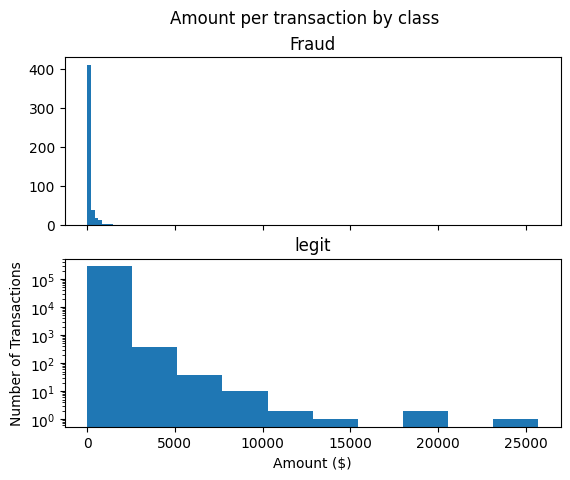

In [335]:
#Graphical Representation
f, (ax1, ax2) = plt.subplots(2, 1, sharex = True)
f.suptitle('Amount per transaction by class')



ax1.hist(fraud.Amount)
ax1.set_title('Fraud')

ax2.hist(legit.Amount)
ax2.set_title('legit')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

plt.yscale('log')
plt.show()

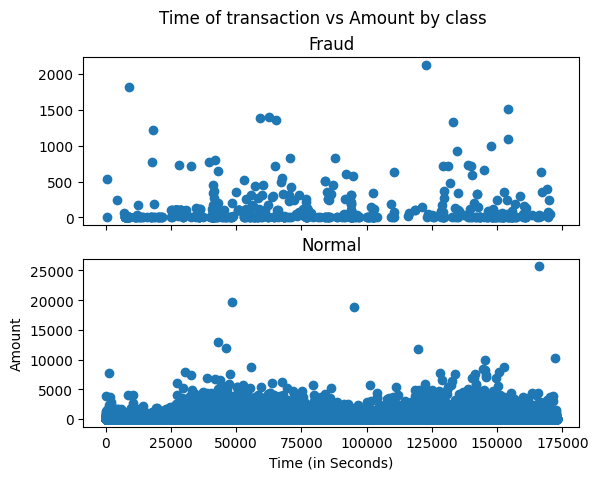

In [336]:
f, (ax1, ax2) = plt.subplots(2, 1,sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(legit.Time, legit.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

**Preparing the Dataset**

In [337]:
credit_df = new_df.drop(['Time'], axis=1)

credit_df['Amount'] = StandardScaler().fit_transform(credit_df['Amount'].values.reshape(-1, 1))

In [338]:
X = credit_df.drop('Class', axis=1)
Y = credit_df['Class']


**Splitting the dataset**

In [339]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

**Implementing ML Models**


**Logistic Regression**

In [340]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
y_pred_log_reg = log_reg.predict(X_test)





**Evaluating Measures**

In [341]:
def calculate_metrics(Y_test, y_pred):
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1
    }


**Evaluation on Logistic Regression**

In [342]:
# Calculate metrics for Logistic Regression
print("Logistic regression results")
metrics_log_reg = calculate_metrics(Y_test, y_pred_log_reg)
print("Accuracy", metrics_log_reg['Accuracy'])
print("Prescision", metrics_log_reg['Precision'])
print("Recall", metrics_log_reg['Recall'])
print("F1 score", metrics_log_reg['F1 score'])



Logistic regression results
Accuracy 0.9405405405405406
Prescision 0.9782608695652174
Recall 0.9090909090909091
F1 score 0.9424083769633508


**Random Forest**

In [343]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100)
# Train the classifier
rf_classifier.fit(X_train, Y_train)
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)


**Evaluation on Random Forest**

In [344]:
# Calculate metrics for Logistic Regression
print("Random Forest results")
metrics_rf= calculate_metrics(Y_test, y_pred_rf)
print("Accuracy", metrics_rf['Accuracy'])
print("Prescision", metrics_rf['Precision'])
print("Recall", metrics_rf['Recall'])
print("F1 score", metrics_rf['F1 score'])


Random Forest results
Accuracy 0.9135135135135135
Prescision 0.946236559139785
Recall 0.8888888888888888
F1 score 0.9166666666666666


**Naive Byes**

In [345]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, Y_train)
y_pred_nb = nb_classifier.predict(X_test)


**Evaluation on Naive Byes**

In [346]:
print("Naive Byes Results")
metrics_nb=calculate_metrics(Y_test, y_pred_nb)
print("Accuracy", metrics_nb['Accuracy'])
print("Prescision", metrics_nb['Precision'])
print("Recall", metrics_nb['Recall'])
print("F1 score", metrics_nb['F1 score'])



Naive Byes Results
Accuracy 0.8810810810810811
Prescision 0.9325842696629213
Recall 0.8383838383838383
F1 score 0.8829787234042553


**KNN Algorithm**

In [347]:
# Create a K-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the classifier
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

**Evaluation on KNN**

In [348]:
print("KNN results")
metrics_knn=calculate_metrics(Y_test, y_pred_knn)
print("Accuracy", metrics_knn['Accuracy'])
print("Prescision", metrics_knn['Precision'])
print("Recall", metrics_knn['Recall'])
print("F1 score", metrics_knn['F1 score'])

KNN results
Accuracy 0.9351351351351351
Prescision 0.978021978021978
Recall 0.898989898989899
F1 score 0.9368421052631579


**Decision Tree Classifier**

In [349]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

**Evaluation on Decision Tree**

In [350]:
print("Decision Tree results")
metrics_dt=calculate_metrics(Y_test, y_pred_dt)
print("Accuracy", metrics_dt['Accuracy'])
print("Prescision", metrics_dt['Precision'])
print("Recall", metrics_dt['Recall'])
print("F1 score", metrics_dt['F1 score'])


Decision Tree results
Accuracy 0.8756756756756757
Prescision 0.88
Recall 0.8888888888888888
F1 score 0.8844221105527639


**SVM Classifier**

In [351]:
# Create a Support Vector Machine classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the classifier
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

**Evaluation on SVM**

In [352]:
print("SVM Results")
metrics_svm=calculate_metrics(Y_test, y_pred_svm)
print("Accuracy", metrics_svm['Accuracy'])
print("Prescision", metrics_svm['Precision'])
print("Recall", metrics_svm['Recall'])
print("F1 score", metrics_svm['F1 score'])

SVM Results
Accuracy 0.9405405405405406
Prescision 0.9782608695652174
Recall 0.9090909090909091
F1 score 0.9424083769633508


**Best Model on the basis of Accuracy**

In [353]:
def compare_all_models(metrics_dict):
    best_model = None
    best_accuracy = 0.0
    
    for model_name, metrics in metrics_dict.items():
        accuracy = metrics['Accuracy']
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = model_name
    
    return best_model

metrics_nb = calculate_metrics(Y_test, y_pred_nb)
metrics_log_reg = calculate_metrics(Y_test, y_pred_log_reg)
metrics_rf = calculate_metrics(Y_test, y_pred_rf)
metrics_dt= calculate_metrics(Y_test, y_pred_dt)
metrics_svm = calculate_metrics(Y_test, y_pred_svm)
metrics_knn = calculate_metrics(Y_test, y_pred_knn)
metrics_dict = {
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_log_reg,
    'Random Forest':metrics_rf,
    'Decision Tree' : metrics_dt,
    'SVM':metrics_svm,
    'KNN':metrics_knn
    
}

best_model = compare_all_models(metrics_dict)
print("Best Model based on Accuracy:", best_model)


Best Model based on Accuracy: Logistic Regression


**Best Model on the basis of F1 Score**

In [354]:
def compare_all_models(metrics_dict):
    best_model = None
    best_f1_score = 0.0
    
    for model_name, metrics in metrics_dict.items():
        f1_score = metrics['F1 score']
        
        if f1_score> best_f1_score:
            best_f1_score = f1_score
            best_model = model_name
    
    return best_model

metrics_nb = calculate_metrics(Y_test, y_pred_nb)
metrics_log_reg = calculate_metrics(Y_test, y_pred_log_reg)
metrics_rf = calculate_metrics(Y_test, y_pred_rf)
metrics_dt= calculate_metrics(Y_test, y_pred_dt)
metrics_svm = calculate_metrics(Y_test, y_pred_svm)
metrics_knn = calculate_metrics(Y_test, y_pred_knn)

metrics_dict = {
    'Naive Bayes': metrics_nb,
    'Logistic Regression': metrics_log_reg,
    'Random Forest':metrics_rf,
    'Decision Tree' : metrics_dt,
    'SVM':metrics_svm,
    'KNN':metrics_knn
    
}

best_model = compare_all_models(metrics_dict)
print("Best Model based on F1 score:", best_model)


Best Model based on F1 score: Logistic Regression
